In [19]:
from scipy.stats import norm
import statsmodels.api as sm
import pandas as pd
import math as mth
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
#sys.path.append('/Users/rodrigo/Desktop/Portfolio-and-Risk-Management/Libraries')
sys.path.append('/Users/rodrigo/Library/Mobile Documents/com~apple~CloudDocs/UChicago/2025_1_Quarter/FINM 367000 Portfolio and Risk Management/Code/Libraries')
import CAPM_decomposition as capm
import Stats_portfolio as st
import portfolio_optimization as port

In [20]:
source = '/Users/rodrigo/Library/Mobile Documents/com~apple~CloudDocs/UChicago/2025_1_Quarter/FINM 367000 Portfolio and Risk Management/Code/Source/factor_pricing_data_monthly.xlsx'
sheet_name_factors = "factors (excess returns)"
sheet_name_portfolio = "portfolios (excess returns)"

df_factors = pd.read_excel(source, sheet_name= sheet_name_factors, index_col = "Date")
df_portfolio = pd.read_excel(source, sheet_name= sheet_name_portfolio, index_col = "Date")

n_temp = 12

In [21]:
display(df_factors)
display(df_portfolio)

,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.0550,0.0188,0.0185,-0.0184,0.0189,0.0745
1980-02-29,-0.0123,-0.0162,0.0059,-0.0095,0.0292,0.0789
1980-03-31,-0.1289,-0.0697,-0.0096,0.0182,-0.0105,-0.0958
1980-04-30,0.0396,0.0105,0.0103,-0.0218,0.0034,-0.0048
1980-05-31,0.0526,0.0200,0.0038,0.0043,-0.0063,-0.0118
...,...,...,...,...,...,...
2025-04-30,-0.0084,-0.0186,-0.0340,-0.0285,-0.0267,0.0497
2025-05-31,0.0606,-0.0072,-0.0288,0.0126,0.0251,0.0221
2025-06-30,0.0486,-0.0002,-0.0160,-0.0319,0.0145,-0.0264


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0073,0.0285,0.0084,0.1009,-0.0143,0.0995,0.0348,0.0323,0.0048,0.0059,...,0.0158,0.0851,0.0466,-0.0125,0.0430,-0.0284,0.0254,0.0770,0.0306,0.0666
1980-02-29,0.0125,-0.0609,-0.0967,-0.0323,-0.0575,-0.0316,-0.0492,-0.0803,-0.0556,-0.0169,...,-0.0083,-0.0543,-0.0345,-0.0641,-0.0653,-0.0824,-0.0960,-0.0352,-0.0283,-0.0273
1980-03-31,-0.2220,-0.1119,-0.0158,-0.1535,-0.0188,-0.1272,-0.0827,-0.1238,-0.0567,-0.0670,...,-0.0819,-0.1512,-0.1602,-0.0905,-0.1450,-0.0559,-0.0877,-0.2449,-0.1261,-0.1737
1980-04-30,0.0449,0.0767,0.0232,0.0289,0.0830,-0.0529,0.0785,0.0154,0.0305,0.0115,...,0.0422,-0.0102,0.0268,0.0355,0.0539,0.0736,0.0528,0.0964,0.0458,0.0784
1980-05-31,0.0635,0.0797,0.0458,0.0866,0.0822,0.0510,0.0325,0.0888,0.0560,0.0098,...,0.0564,0.1065,0.1142,0.0877,0.1104,0.0570,0.0560,0.0889,0.0846,0.0663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,-0.0103,-0.0214,0.0116,-0.0616,0.0483,-0.0671,0.1377,0.0164,-0.0383,-0.0801,...,-0.0179,-0.0308,0.0163,0.0097,-0.0299,-0.0245,-0.0851,-0.0792,-0.0054,-0.0030
2025-05-31,0.1264,-0.0326,-0.0009,-0.0382,0.0424,0.0517,0.0615,0.0380,0.0372,0.0989,...,0.0211,0.0689,0.0200,0.0609,0.0330,0.0706,-0.0499,0.0089,0.0752,0.0009
2025-06-30,0.0500,-0.0170,-0.0117,-0.0201,0.0041,0.0627,0.0992,0.0327,-0.0425,0.0167,...,0.0143,0.0441,0.0121,0.0241,0.0162,0.0616,-0.0028,0.1014,0.0819,-0.0192


In [22]:
st.get_annualize_metrics(df_factors, n_temp)

,mean,vol,skewness,kurtosis,min,max,sharpe_ratio,max drawdown,Var (0.05),CVar (0.05)
MKT,8.755182,15.614240,-0.662636,1.976406,-23.19,13.58,56.071782,-54.11,-7.2430,-10.157857
SMB,0.612044,10.127361,0.365986,4.076040,-15.54,18.46,6.043467,-56.44,-4.3095,-5.766071
HML,2.603869,10.883496,0.146538,2.053074,-13.83,12.86,23.924928,-57.79,-4.2090,-6.593929
RMW,4.404745,8.293124,-0.408805,11.098521,-18.95,13.05,53.113214,-41.78,-2.8500,-4.797333
CMA,2.828759,7.247956,0.322134,1.513527,-7.08,9.01,39.028368,-25.42,-2.7795,-3.979286
UMD,6.031314,15.335172,-1.338438,10.109501,-34.34,18.02,39.329940,-57.82,-6.7295,-10.798571


In [23]:
df_from_2015 = df_factors[df_factors.index >= "2015-01-01"]
st.get_annualize_metrics(df_from_2015, n_temp)

,mean,vol,skewness,kurtosis,min,max,sharpe_ratio,max drawdown,Var (0.05),CVar (0.05)
MKT,11.787187,15.735590,-0.347235,0.691317,-13.35,13.58,74.907820,-25.26,-7.3880,-9.405714
SMB,-2.377500,10.316564,0.392049,0.426484,-8.18,8.34,-23.045464,-32.70,-4.3765,-5.600000
HML,-1.630313,12.988471,0.220470,1.814411,-13.83,12.86,-12.551997,-51.32,-4.9195,-7.964286
RMW,4.001250,7.263168,0.510667,0.912309,-4.78,7.19,55.089595,-9.65,-2.7800,-3.435714
CMA,-0.914063,8.207229,0.383641,1.168948,-7.08,7.73,-11.137285,-25.42,-3.0385,-4.640000
UMD,2.011875,13.738731,-0.693927,2.079915,-16.17,9.97,14.643820,-25.41,-6.0645,-9.337143


2.1 Yes, they have positive risk premia.

2.2 Market and Profitability factors outperformed, while the others have negative excess returns.



<Axes: xlabel='Date'>

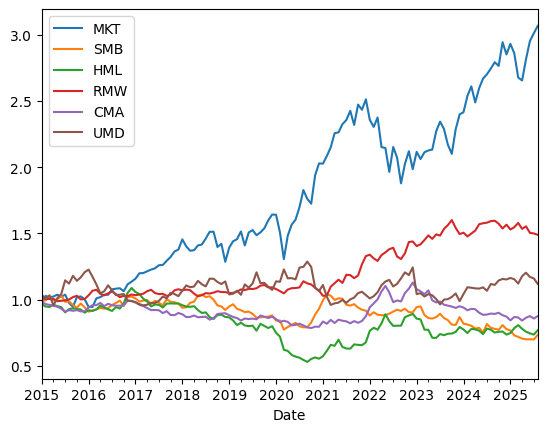

In [24]:
(1 + df_from_2015).cumprod().plot()

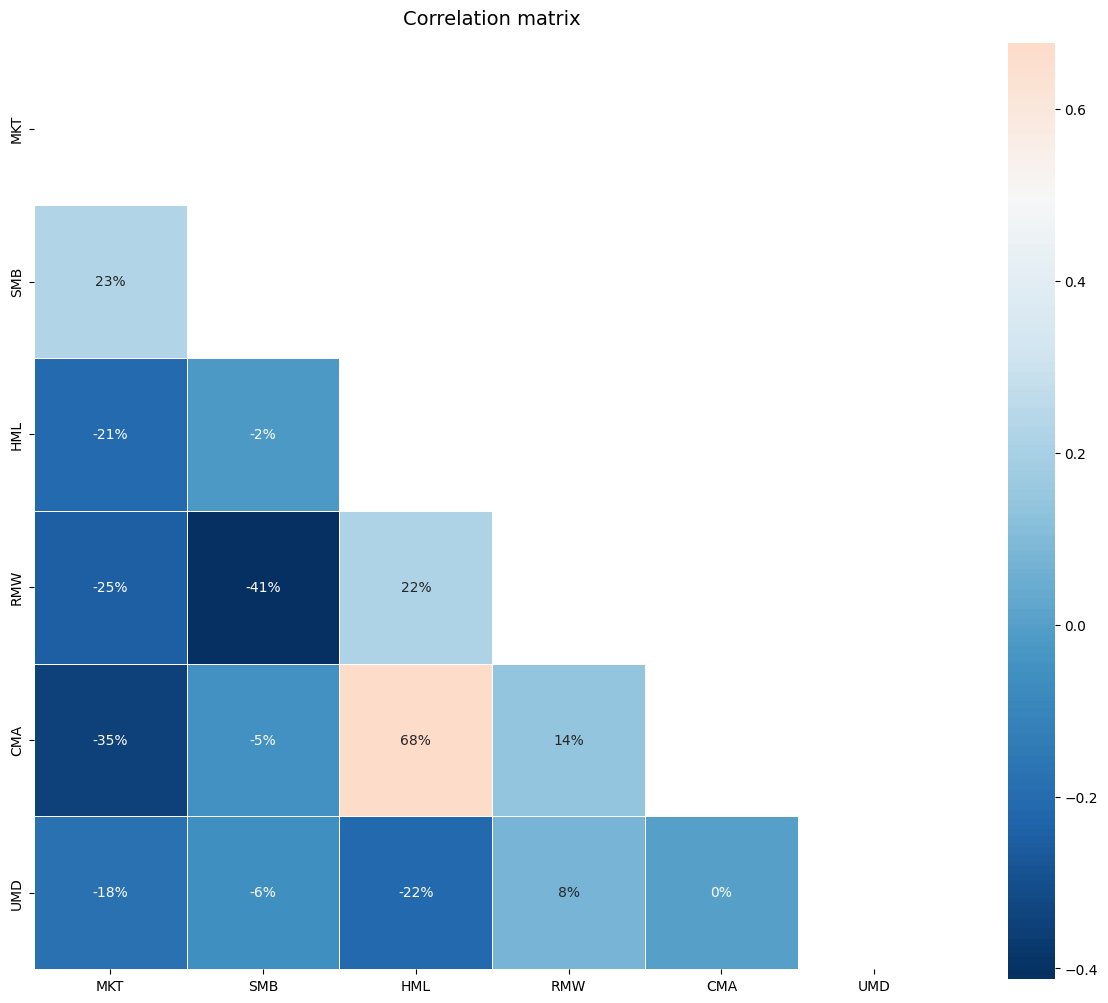

In [ ]:
st.plot_correlations(df_factors)

3.1 In most of the cases, except of the correlation between HML-CMA

3.2 Yes, because HML has high correlation with CMA and with other factors. 

In [32]:
df_factors.corr().replace(1, 0).abs().mean().sort_values()

UMD    0.088767
SMB    0.128800
RMW    0.182874
MKT    0.201908
CMA    0.202171
HML    0.223565
dtype: float64

4.1 The most important is CMA, the least HML.

4.2 Yes its useful, it has positive weight. What matters is correlation with other factors, not return. 

4.4 In one hand, HML is a highly correlated  with CMA, so, when we calculate the optimal weights using the 5 factor model its weight was the smallest one. When we delete CMA of the sample, HML's weight increases. However, we saw an important reduction in SMB, because it has highest correlation with market, but it has higher return, which is used to maximize the sharpe ratio in the portfolio

<Axes: >

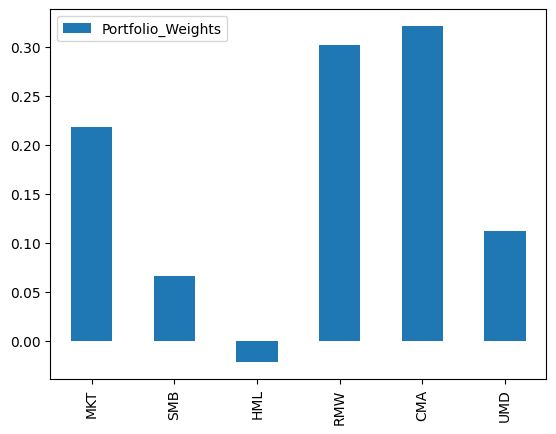

In [14]:
df_factors_weights = port.optimal_weights(df_factors)
df_factors_weights.plot(kind = "bar")

<Axes: >

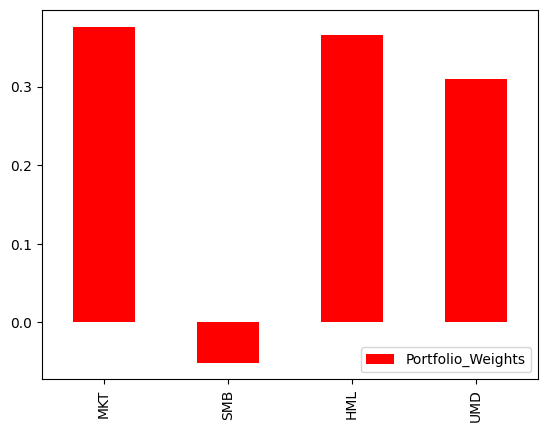

In [ ]:
df_factors_weights_2 = port.optimal_weights(df_factors[["MKT", "SMB", "HML", "UMD"]])
df_factors_weights_2.plot(kind = "bar", color = "red")

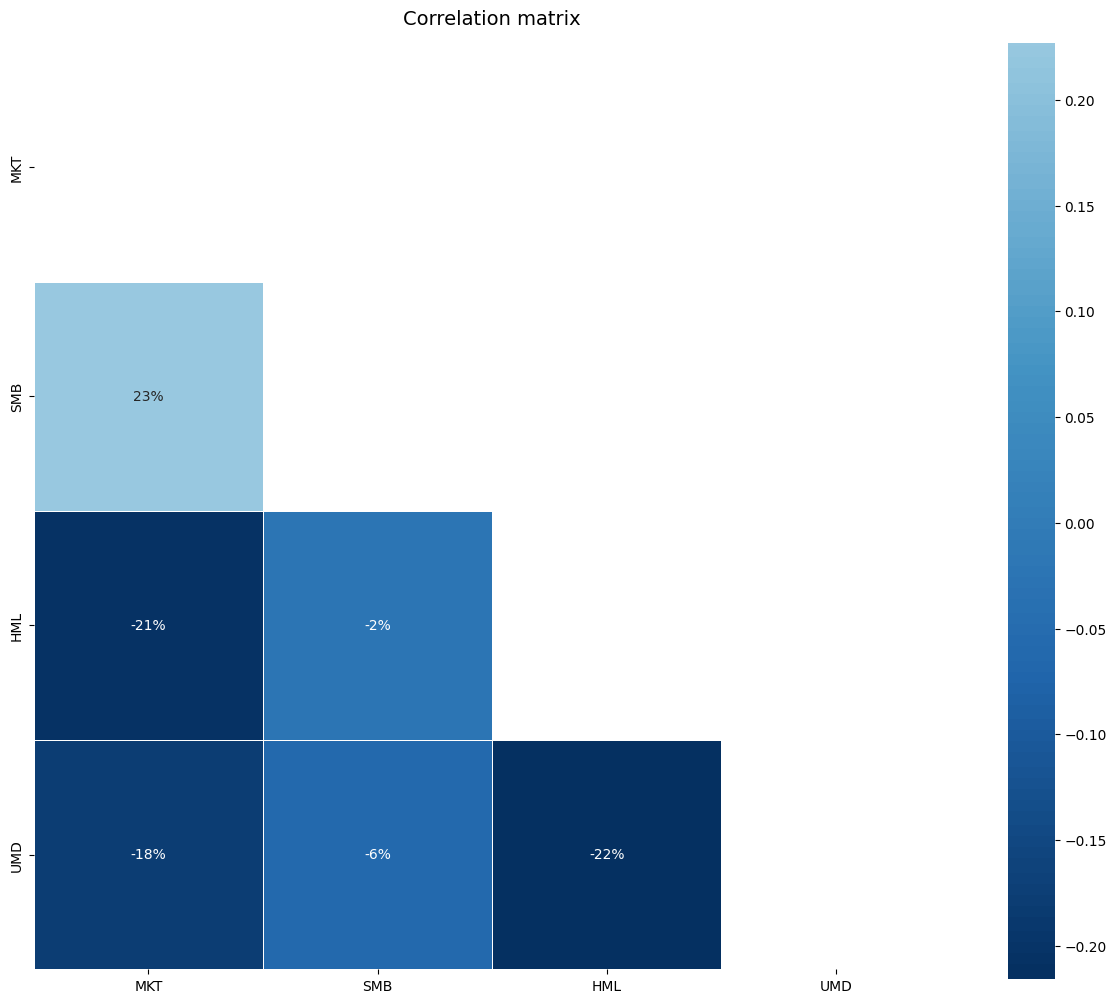

In [36]:
df_factors[["MKT", "SMB", "HML", "UMD"]]
st.plot_correlations(df_factors[["MKT", "SMB", "HML", "UMD"]]
)

In [37]:
models_factors = [["MKT"], 
 ["MKT", "SMB", "HML"], 
 ["MKT", "SMB", "HML", "RMW", "CMA"], 
 ["MKT", "HML", "RMW", "UMD"]]

name_model = ["CAPM", "FF3F", "FF5F", "AQR"]

statistics, cross_sectional, reg_predic, cross_predict = capm.full_pricing_modeling(name_model, 
                          models_factors, 
                          df_factors, 
                          df_portfolio, 
                          n_temp)

In [43]:
df_aqr = statistics["AQR"][["Alpha", "r_squared"]]
#df_aqr["Alpha"].abs().mean()
display(statistics["AQR"][["Alpha", "r_squared"]])

,Alpha,r_squared
Agric,1.165070,34.207448
Food,0.150007,45.506428
Soda,1.538149,30.254373
Beer,0.985340,41.477318
Smoke,4.110971,26.536293
Toys,-3.370381,51.021293
Fun,3.906455,60.721254
Books,-3.670532,68.893318
Hshld,-1.274335,55.471173
Clths,-2.267001,61.896820


2.1 Alpha estimates should be small, very close to zero

2.2 No, there is a 2.5% gap

In [50]:
statistics.filter(like = "Alpha").abs().mean()

CAPM  Alpha    2.097033
FF3F  Alpha    2.435806
FF5F  Alpha    3.137209
AQR   Alpha    2.461085
dtype: float64

In [53]:
statistics.filter(like = "Beta").abs().mean()

CAPM  Beta_MKT    101.406720
FF3F  Beta_MKT    101.542393
      Beta_SMB     25.940765
      Beta_HML     29.972796
FF5F  Beta_MKT    104.295211
      Beta_SMB     30.385175
      Beta_HML     25.348418
      Beta_RMW     35.331177
      Beta_CMA     23.975997
AQR   Beta_MKT    104.418942
      Beta_HML     26.330394
      Beta_RMW     27.555242
      Beta_UMD     10.019981
dtype: float64

3. 

Market factor is necessary, given its high Beta in all the factor models. On the other hand, UMD is less important than the other factors, its mean absolute Beta is lower than the others in the AQR model. 

Therefore, Famma and French do not need to consider the Momentum factor

In [54]:
statistics.filter(like = "r_squared").mean()

CAPM  r_squared    52.262196
FF3F  r_squared    56.787422
FF5F  r_squared    59.176828
AQR   r_squared    57.193459
dtype: float64

4.2 They are good factor decomposition

In [56]:
cross_sectional.filter(like = "avg_")

,avg_MKT,avg_SMB,avg_HML,avg_RMW,avg_CMA,avg_UMD
CAPM,0.087552,NaN,NaN,NaN,NaN,NaN
FF3F,0.087552,0.00612,0.026039,NaN,NaN,NaN
FF5F,0.087552,0.00612,0.026039,0.044047,0.028288,NaN
AQR,0.087552,NaN,0.026039,0.044047,NaN,0.060313


In [64]:
a = cross_sectional.filter(like = "Beta_")
a.columns = [x.replace("Beta_","") for x in a.columns]

In [69]:
b = cross_sectional.filter(like = "avg_")
b.columns = [x.replace("avg_","") for x in b.columns]

(a - b).mean().sort_values() * 100

MKT   -6.148282
UMD   -6.002735
HML   -5.245137
CMA   -5.037077
SMB   -4.664725
RMW   -2.592028
dtype: float64

In [73]:
cross_sectional.filter(like = "MAE").sort_values(by = ["MAE"])

,MAE
FF5F,0.011979
FF3F,0.012002
AQR,0.013608
CAPM,0.015204


In [78]:
statistics.filter(like = "Alpha").abs().mean() / 100 / 12

CAPM  Alpha    0.001748
FF3F  Alpha    0.002030
FF5F  Alpha    0.002614
AQR   Alpha    0.002051
dtype: float64

Yes, they differ susbtantially. Betas are lower.
The models explain time-series behavior quite well (low alphas), but still have meaningful cross-sectional mispricing (higher MAE).